# Set up and Preprocessing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report, roc_curve

In [2]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


### Read the dataset

In [3]:
data = pd.read_excel('fruit_data.xlsx')

### Understanding the size of the dataset

In [4]:
data.shape

(200, 5)

### Inspect the Dataset

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   fruit_type  200 non-null    object 
 2   color       200 non-null    object 
 3   size        200 non-null    object 
 4   weight      200 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 7.9+ KB


### Drop unnecessary columns

In [ ]:
data.drop(columns=['Unnamed: 0'], inplace=True)

### Display the first few rows of the dataset

In [6]:
data.head()

,Unnamed: 0,fruit_type,color,size,weight
0,0,grape,Yellow,Tiny,8.303385
1,1,apple,Pink,Largee,80.976370
2,2,banana,Pale Yellow,Large,74.615192
3,3,grape,Red,Tiny,6.924070
4,4,banana,Creamy White,Largee,82.002542


### Understanding the uniqueness of the data

In [7]:
data.nunique()

Unnamed: 0    200
fruit_type      3
color           9
size            5
weight         81
dtype: int64

### Finding missing values

In [8]:
data.isnull().sum()

Unnamed: 0    0
fruit_type    0
color         0
size          0
weight        0
dtype: int64

### Description of dataset

In [9]:
data.describe()

,Unnamed: 0,weight
count,200.000000,200.000000
mean,99.500000,59.047220
std,57.879185,46.697739
min,0.000000,1.000000
25%,49.750000,8.142752
50%,99.500000,63.109415
75%,149.250000,94.367815
max,199.000000,250.000000


### Clean categorical data

In [10]:
data['size'].replace({'Largee': 'Large'}, inplace=True)
data['color'].replace({'Yellow1': 'Yellow'}, inplace=True)

C:\Users\azama\AppData\Local\Temp\ipykernel_45440\2045755046.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['size'].replace({'Largee': 'Large'}, inplace=True)
C:\Users\azama\AppData\Local\Temp\ipykernel_45440\2045755046.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.



### Verify

In [11]:
sizes = data['size'].unique()
colors = data['color'].unique()
print("Sizes:", sizes)
print("Colors:", colors)

Sizes: ['Tiny' 'Large' 'Small' 'Medium']
Colors: ['Yellow' 'Pink' 'Pale Yellow' 'Red' 'Creamy White' 'Green' 'Purple'
 'Black']


### Encode categorical variables

In [12]:

le_fruit = LabelEncoder()
le_color = LabelEncoder()
le_size = LabelEncoder()

data['fruit_type_encoded'] = le_fruit.fit_transform(data['fruit_type'])
data['color_encoded'] = le_color.fit_transform(data['color'])
data['size_encoded'] = le_size.fit_transform(data['size'])

## Detect and Visualize Outliers

### Boxplot to visualize outliers in the 'weight' column

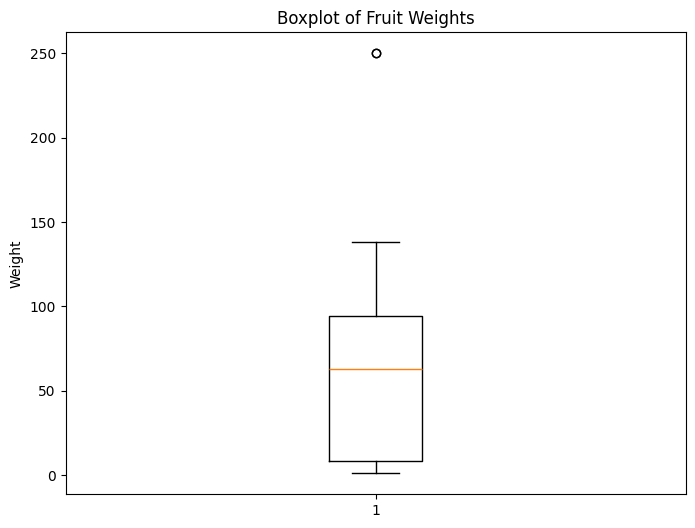

In [13]:
plt.figure(figsize=(8, 6))
plt.boxplot(data['weight'])
plt.title('Boxplot of Fruit Weights')
plt.ylabel('Weight')
plt.show()

### Distribution of Fruit Weights

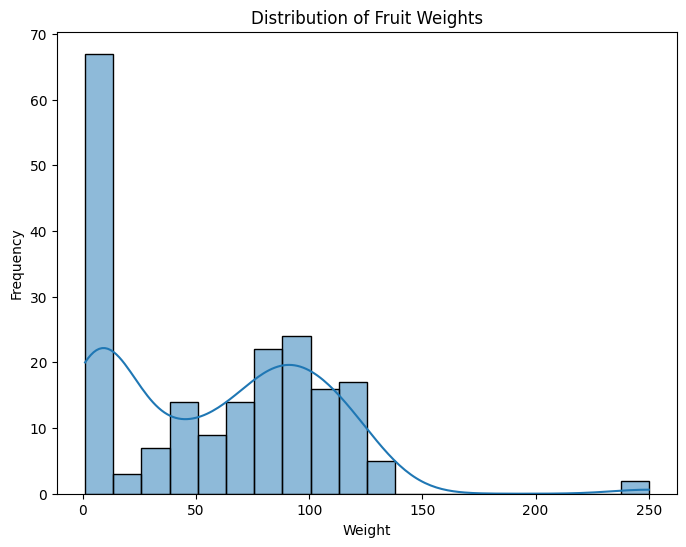

In [14]:
plt.figure(figsize=(8, 6))
sns.histplot(data['weight'], bins=20, kde=True)
plt.title('Distribution of Fruit Weights')
plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.show()

### Scatter Plot of Weights vs. Sizes

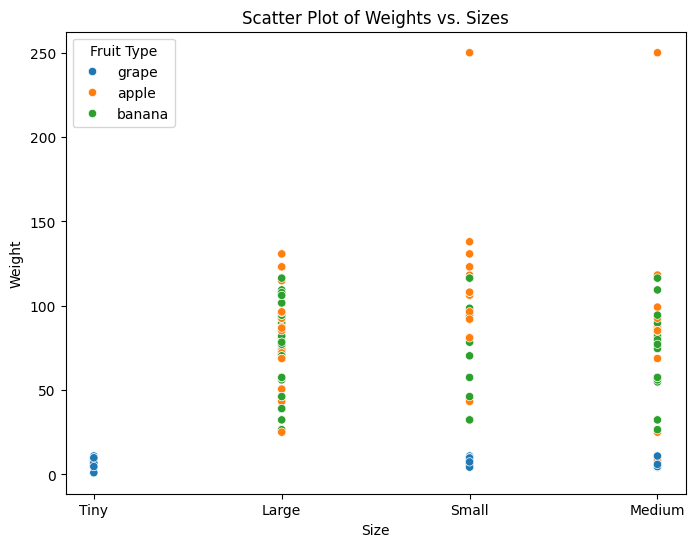

In [15]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='size', y='weight', hue='fruit_type', data=data)
plt.title('Scatter Plot of Weights vs. Sizes')
plt.xlabel('Size')
plt.ylabel('Weight')
plt.legend(title='Fruit Type')
plt.show()

### Pair plot of attributes

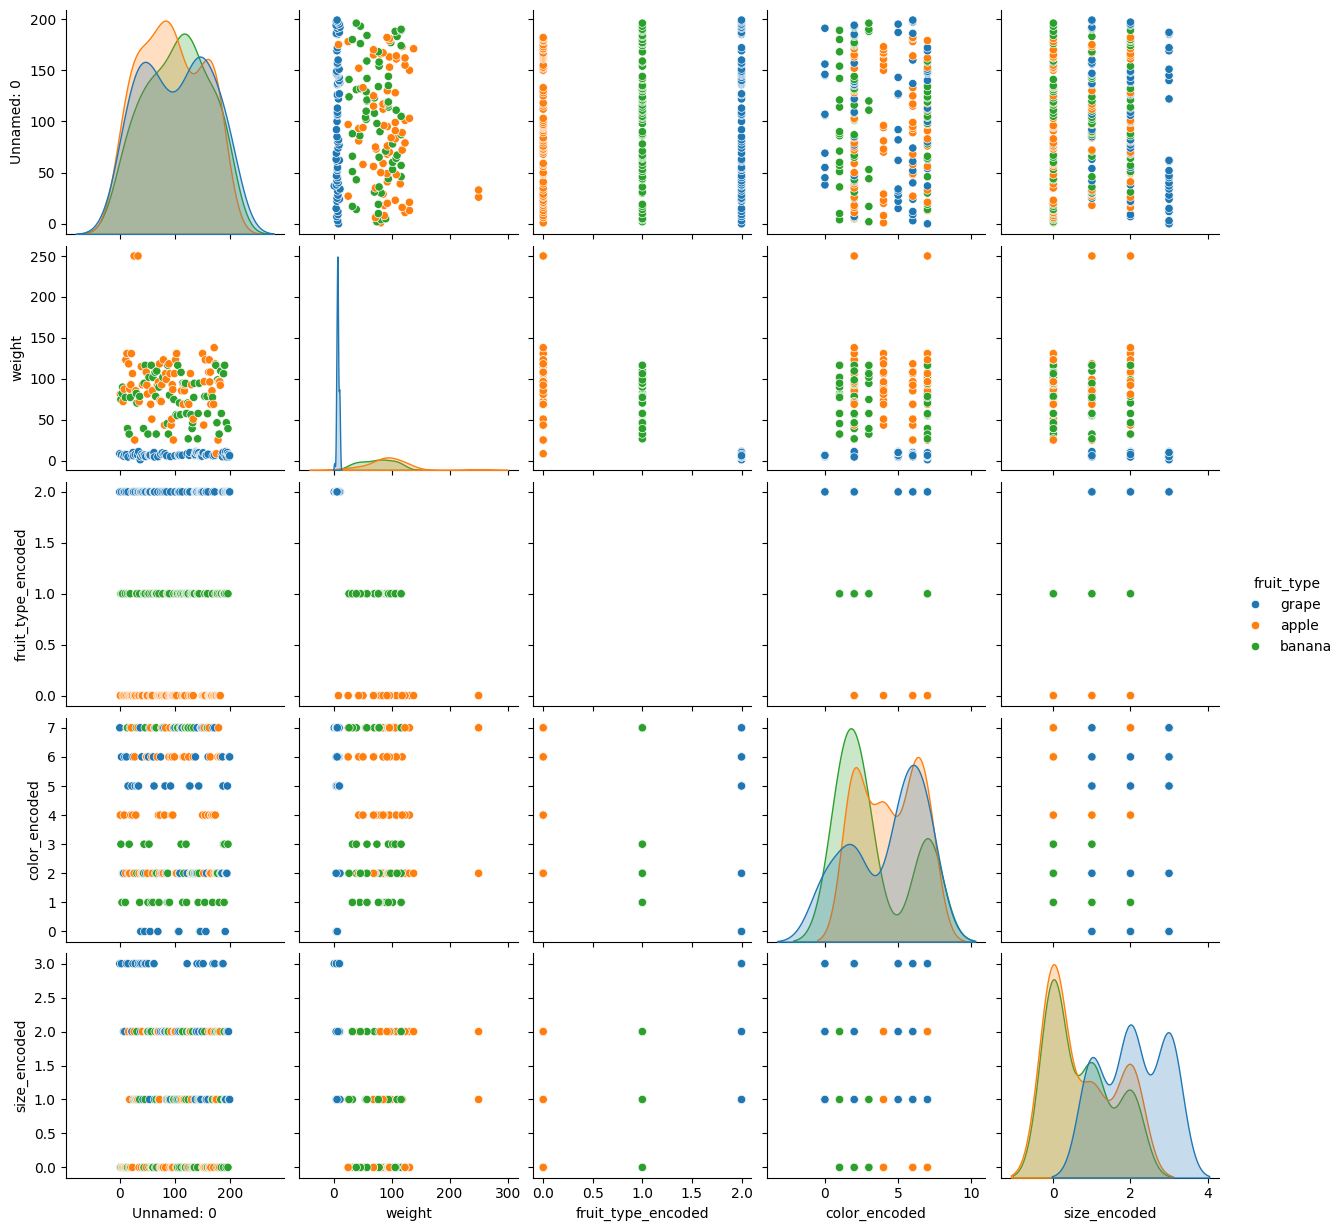

In [16]:
sns.pairplot(data, hue='fruit_type', height=2.5)
plt.show()

### Generate descriptive statistics to help to identify outliers

In [17]:
weight_stats = data['weight'].describe()
print("Weight Statistics:\n", weight_stats)

Weight Statistics:
 count    200.000000
mean      59.047220
std       46.697739
min        1.000000
25%        8.142752
50%       63.109415
75%       94.367815
max      250.000000
Name: weight, dtype: float64


### Outlier Treatment using IQR(Interquartile Range)-based filtering

In [18]:
Q1 = data['weight'].quantile(0.25)
Q3 = data['weight'].quantile(0.75)
IQR = Q3 - Q1

### Define lower and upper bounds for outliers

In [19]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

### Filter out the outliers (Optional step, based on your needs)

In [20]:
data_filtered = data[(data['weight'] >= lower_bound) & (data['weight'] <= upper_bound)]

### Display the filtered data

In [38]:
data_filtered.head()

,Unnamed: 0,fruit_type,color,size,weight,fruit_type_encoded,color_encoded,size_encoded
0,0,grape,Yellow,Tiny,8.303385,2,7,3
1,1,apple,Pink,Large,80.976370,0,4,0
2,2,banana,Pale Yellow,Large,74.615192,1,3,0
3,3,grape,Red,Tiny,6.924070,2,6,3
4,4,banana,Creamy White,Large,82.002542,1,1,0


# Hyperparameter tuning

### Prepare features X and target y

In [21]:
X = data[['color_encoded', 'size_encoded', 'weight']]
y = data['fruit_type_encoded']

### Split the data into training and testing sets

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Decision Tree

### Define the parameter grid

In [23]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'auto', 'sqrt', 'log2'],
    'max_leaf_nodes': [None, 10, 20, 30, 40, 50],
    'min_impurity_decrease': [0.0, 0.01, 0.1, 0.2],
    'class_weight': [None, 'balanced']
}

### Create a Desicion Tree model

In [24]:
tree = DecisionTreeClassifier()

### Initialize the GridSearchCV object

In [25]:
grid_search_destree = GridSearchCV(estimator=tree, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy', verbose=2)

### Perform the grid search on the training data

In [26]:
grid_search_destree.fit(X_train, y_train)

Fitting 5 folds for each of 34560 candidates, totalling 172800 fits


c:\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
43200 fits failed out of a total of 172800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
14474 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Python312\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Python312\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "c:\Python312\Lib\site-packages\sklearn\utils\_param_validation.py", line 95, in v

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'class_weight': [None, 'balanced'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30, 40],
                         'max_features': [None, 'auto', 'sqrt', 'log2'],
                         'max_leaf_nodes': [None, 10, 20, 30, 40, 50],
                         'min_impurity_decrease': [0.0, 0.01, 0.1, 0.2],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']},
             scoring='accuracy', verbose=2)

### Get the best parameters and best estimator

In [27]:
best_params_destree = grid_search_destree.best_params_
best_tree = grid_search_destree.best_estimator_

### Print the best parameters

In [28]:
print("Best Parameters for Decision Tree:", best_params_destree)

Best Parameters for Decision Tree: {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': 20, 'min_impurity_decrease': 0.01, 'min_samples_leaf': 2, 'min_samples_split': 2, 'splitter': 'best'}


### Evaluate the best model on the test data

In [29]:
def evaluate_model(y_true, y_pred, model_name):
    print(f"--- {model_name} Performance ---")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print(f"F1 Score: {f1_score(y_true, y_pred, average='weighted'):.4f}")
    print(f"Classification Report:\n{classification_report(y_true, y_pred, target_names=le_fruit.classes_)}")
    print("\n")

In [30]:
y_pred_best_tree = best_tree.predict(X_test)
evaluate_model(y_test, y_pred_best_tree, "Optimized Decision Tree")

--- Optimized Decision Tree Performance ---
Accuracy: 0.8000
F1 Score: 0.8013
Classification Report:
              precision    recall  f1-score   support

       apple       0.81      0.72      0.76        18
      banana       0.67      0.77      0.71        13
       grape       1.00      1.00      1.00         9

    accuracy                           0.80        40
   macro avg       0.83      0.83      0.83        40
weighted avg       0.81      0.80      0.80        40





## Logistic Regression

### Define the parameter grid

In [52]:
param_grid_logreg = {
    'penalty': ['l1', 'l2', 'elasticnet', None],
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga', 'lbfgs', 'sag'],
    'max_iter': [100, 200, 300, 500],
    'class_weight': [None, 'balanced'],
    'l1_ratio': [0, 0.25, 0.5, 0.75, 1]
}

### Create a Logistic Regression model

In [56]:
logreg = LogisticRegression()

### Initialize the GridSearchCV object

In [57]:
grid_search_logreg = GridSearchCV(estimator=logreg, param_grid=param_grid_logreg, cv=5, n_jobs=-1, scoring='accuracy', verbose=2)

### Perform the grid search on the training data

In [58]:
grid_search_logreg.fit(X_train, y_train)

Fitting 5 folds for each of 3200 candidates, totalling 16000 fits


c:\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
6000 fits failed out of a total of 16000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1000 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Python312\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1194, in fit
    solver = _check_solver(self.solver, self.penalty, s

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'class_weight': [None, 'balanced'],
                         'l1_ratio': [0, 0.25, 0.5, 0.75, 1],
                         'max_iter': [100, 200, 300, 500],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['liblinear', 'saga', 'lbfgs', 'sag']},
             scoring='accuracy', verbose=2)

### Get the best parameters and best estimator

In [59]:
best_params_logreg = grid_search_logreg.best_params_
best_logreg = grid_search_logreg.best_estimator_

### Print the best parameters

In [61]:
print("Best Parameters for Logistic Regression:", best_params_logreg)

Best Parameters for Logistic Regression: {'C': 1, 'class_weight': None, 'l1_ratio': 0, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}


### Evaluate the best model on the test data

In [62]:
y_pred_best_logreg = best_logreg.predict(X_test)
evaluate_model(y_test, y_pred_best_logreg, "Optimized Logistic Regression")

--- Optimized Logistic Regression Performance ---
Accuracy: 0.7000
F1 Score: 0.6877
Classification Report:
              precision    recall  f1-score   support

       apple       0.64      0.78      0.70        18
      banana       0.56      0.38      0.45        13
       grape       1.00      1.00      1.00         9

    accuracy                           0.70        40
   macro avg       0.73      0.72      0.72        40
weighted avg       0.69      0.70      0.69        40



